- 비지도학습 : 종속변수가 없이 컴퓨터가 데이터의 패턴과 규칙을 찾아내는 방법으로 분석가의 주관이 많이 반영됨
    - 종속변수가 없어 평가가 어려움

- KMeans 클러스터링 (군집) : 각 군집의 평균을 활용하여 K개의 군집으로 묶는 알고리즘
    -  데이터 전처리에서 라벨링을 위해 사용하기도 함

In [1]:
import os
os.chdir("Y:\Python\Mega_IT\F.Machine_Learning/2.Unsupervised_Learning/1.KMeans")
os.getcwd()

'Y:\\Python\\Mega_IT\\F.Machine_Learning\\2.Unsupervised_Learning\\1.KMeans'

In [2]:
import sys
sys.path.append("Y:\Python\Mega_IT")

from yjk_module.preprocessing import *
from yjk_module.ml_module import *

In [3]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [4]:
from hossam.util import *
from hossam.plot import *
from hossam.analysis import *

In [5]:
origin1 = pd.read_excel("./data/game_usage.xlsx")

In [6]:
origin1.head()

,time spent,game level
0,39,944
1,55,705
2,29,757
3,59,999
4,7,109


- 게임 유저 군집화
    - 게임을 : 오래했다 / 조금했다
    - 게임을 : 잘한다 / 못한다
        - 총 4개의 군집

In [7]:
origin1.describe().T

,count,mean,std,min,25%,50%,75%,max
time spent,100.0,45.95,27.858363,1.0,23.75,45.0,70.0,96.0
game level,100.0,538.04,276.650270,13.0,278.50,560.0,770.5,999.0


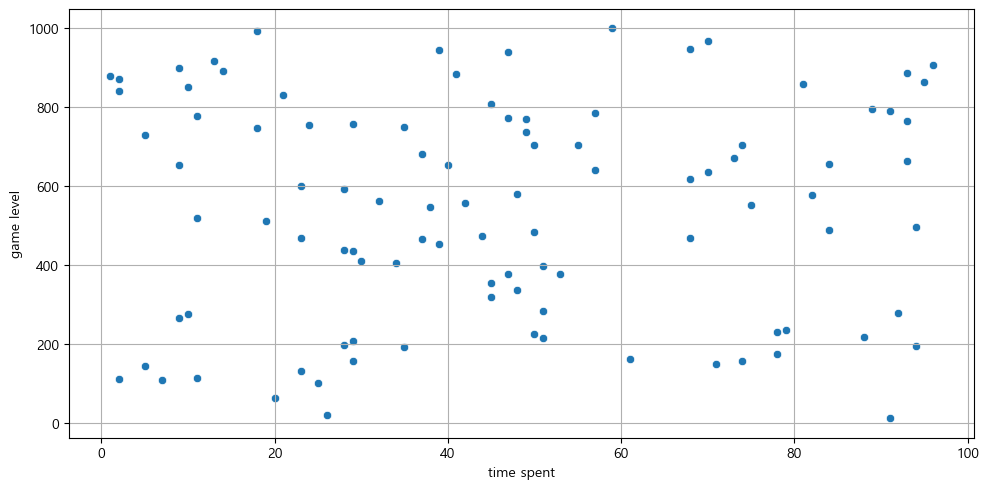

In [8]:
my_scatterplot(df = origin1, xname = "time spent", yname = "game level")

- KMeans의 평가 : 실루엣 스코어
    - GridSearchCV는 실루엣 스코어를 지원하지 않아 KMeans는 GridSearchCV 사용 불가

- KMeans의 하이퍼파라미터
    - n_clusters : 군집 개수
    - init : 초기 군집 중심점 설정 방법, k-means++ 권장, 직접 좌표값을 설정할 수도 있음
    - n_init : 군집 중심점의 초기화 수
    - max_iter : 최대 반복 횟수
    - tol : 수렴 인내도
    - algorithm : 군집 알고리즘
    - random_stateint : 랜덤 시드

In [9]:
estimate = KMeans(n_clusters = 4)
estimate.fit(origin1)

cluster = estimate.predict(origin1)

C:\Users\yjg10\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [10]:
cluster

array([3, 0, 0, 3, 1, 0, 2, 2, 1, 2, 3, 0, 1, 2, 3, 1, 0, 1, 3, 2, 0, 3,
       1, 0, 1, 3, 0, 1, 2, 2, 0, 0, 2, 1, 0, 0, 2, 1, 1, 3, 1, 0, 3, 0,
       3, 0, 0, 2, 0, 1, 2, 1, 1, 1, 2, 3, 1, 0, 3, 2, 1, 0, 2, 2, 2, 0,
       2, 1, 2, 0, 3, 2, 1, 1, 3, 1, 3, 0, 1, 2, 1, 0, 2, 3, 1, 2, 0, 2,
       1, 1, 0, 0, 2, 0, 3, 3, 2, 3, 1, 2])

In [11]:
df = origin1.copy()
df['cluster'] = cluster

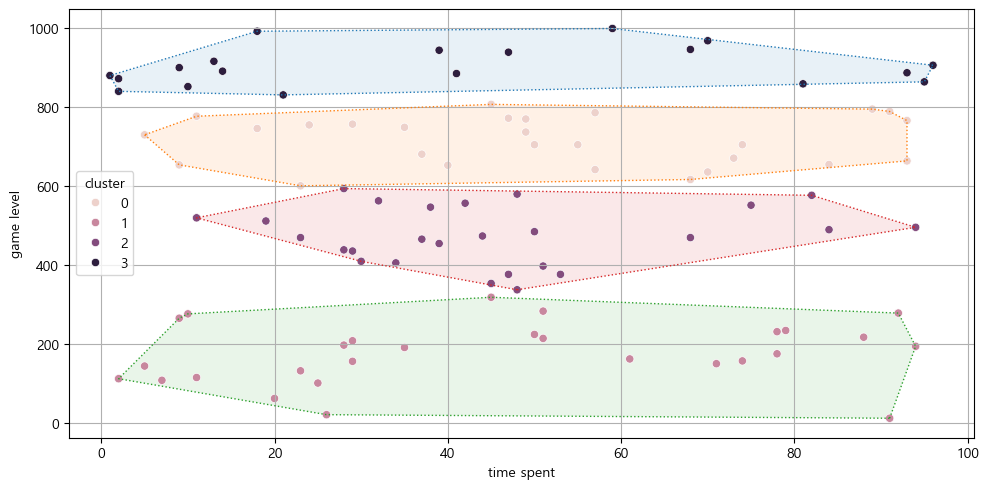

In [12]:
my_convex_hull(df, xname = 'time spent', yname = 'game level', hue = 'cluster')

- 데이터 스케일링이 되지 않아 원하는 방향의 군집화가 되지 않음

- 표준화 적용

In [13]:
pp = YjkPreprocessor()
pp.set_strategy(outline = None, null = None, scaler = 's')

아래와 같이 처리합니다.
+-------------+----------------+
| 범주        | 처리방법       |
|-------------+----------------|
| 이상치 처리 | 처리하지 않음  |
| 결측치 처리 | 처리하지 않음  |
| 스케일러    | StandardScaler |
| 인코딩      | 원핫인코딩     |
+-------------+----------------+


In [14]:
df_P = pp.fit_transform(origin1)

데이터프레임 크기 : (100, 2)
데이터프레임에 결측치는 없습니다.
연속형 데이터 컬럼 : ['time spent', 'game level'], 총 2개


In [15]:
km = KMeans(n_clusters = 4, random_state = 0)
km.fit(df_P)

C:\Users\yjg10\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=0)

In [16]:
df_P['cluster'] = km.labels_

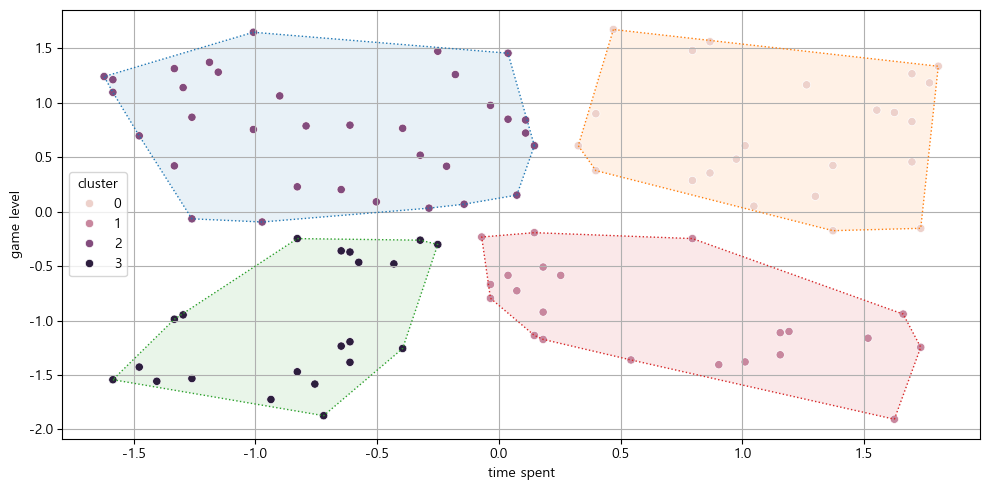

In [17]:
my_convex_hull(df_P, xname = 'time spent', yname = 'game level', hue = 'cluster')

- 군집 시각화에는 ConvexHull이 유용함

In [18]:
km.cluster_centers_

array([[ 1.16723812,  0.72658906],
       [ 0.65282429, -0.94139204],
       [-0.69638643,  0.77098734],
       [-0.83483203, -1.05783299]])

In [19]:
km.inertia_

52.814747166869935

In [28]:
inertia_li = []
init_range = range(2, 11)

for i in init_range:
    km = KMeans(n_clusters = i)
    km.fit(df_P)
    inertia_li.append(km.inertia_)

C:\Users\yjg10\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\yjg10\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\yjg10\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\yjg10\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

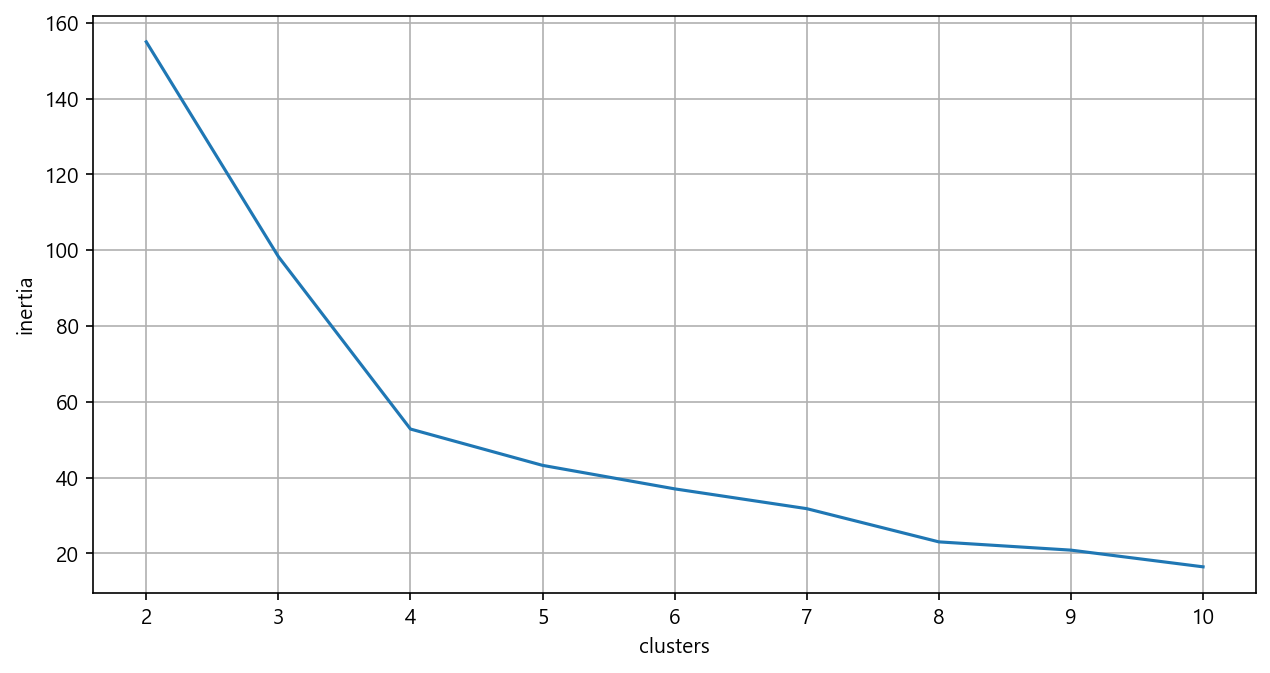

In [26]:
plt.figure(figsize = (10, 5), dpi = 150)
plt.plot(init_range, inertia_li)
plt.xlabel("clusters")
plt.ylabel("inertia")
plt.grid()
plt.show()